In [1]:
using Plots
using LinearAlgebra
using DelimitedFiles
using Distributions
using StatsBase
using ScikitLearn
using IterTools
@sk_import linear_model: LinearRegression
gr()

Plots.GRBackend()

# 例45 Boston : AIC, BIC, D

In [2]:
boston = readdlm("housing.data");
X = boston[:, [1,3,5,6,7,8,10,11,12,13]];
y = boston[:, end];

In [3]:
res = LinearRegression()

function RSS_min(X, y, T)
    Smin = Inf
    setq = -1
    m = length(T)
    for j in 1:m
        q = T[j]
        ScikitLearn.fit!(res, X[:, q], y)
        yhat = res.predict(X[:, q])
        S = norm(yhat - y) .^ 2
        if S < Smin
            Smin = S
            setq = q
        end
    end
    return (Smin, setq)
end

RSS_min (generic function with 1 method)

In [4]:
n, p = size(X)
AICmin = Inf
setmin = -1
for k in 1:p
    T = [perm for perm in subsets(1:p, k)]
    Smin, setq = RSS_min(X, y, T)
    AIC = n * log(Smin) + 2 * k
    if AIC < AICmin
        AICmin = AIC
        setmin = setq
    end
end

println(AICmin, " ", setmin)

4770.415163216072 [1, 3, 4, 6, 8, 9, 10]


In [5]:
n, p = size(X)
BICmin = Inf
setmin = -1
for k in 1:p
    T = [perm for perm in subsets(1:p, k)]
    Smin, setq = RSS_min(X, y, T)
    BIC = n * log(Smin) + k * log(n)
    if BIC < BICmin
        BICmin = BIC
        setmin = setq
    end
end

println(BICmin, " ", setmin)

4796.644613310488 [3, 4, 6, 8, 9, 10]


In [6]:
n, p = size(X)
ybar = mean(y)
TSS = norm(y .- ybar) .^ 2
Dmax = -Inf
setmin = -1
for k in 1:p
    T = [perm for perm in subsets(1:p, k)]
    Smin, setq = RSS_min(X, y, T)
    D = 1 - (Smin / (n - p - 1)) / (TSS * (n - 1))
    if D > Dmax
        Dmax = D
        setmin = setq
    end
end

println(Dmax, " ", setmin)

0.9999988717090253 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# 例46 AIC, BICの変化

In [7]:
function IC(X, y, k)
    n, p = size(X)
    T = [perm for perm in subsets(1:p, k)]
    S, setq = RSS_min(X, y, T)
    AIC = n * log(S) + 2 * k
    BIC = n * log(S) + k * log(n)
    return AIC, BIC
end

IC (generic function with 1 method)

In [8]:
AICseq = Float64[]
BICseq = Float64[]

for k in 1:p
    aic, bic = IC(X, y, k)
    push!(AICseq, aic)
    push!(BICseq, bic)
end

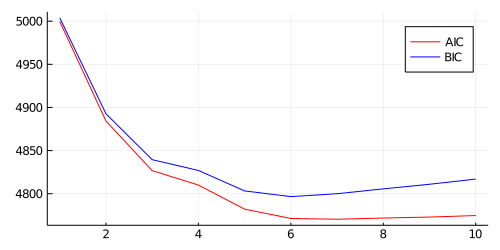

In [9]:
x_seq = collect(1:p)
pp = plot(size=(500, 250))
plot!(pp, x_seq, AICseq, color=:red, label="AIC")
plot!(pp, x_seq, BICseq, color=:blue, label="BIC")
pp